# Dependencies

In [942]:
# Data Processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut

import seaborn as sns


In [2697]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler


In [6]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [7]:

from sklearn.metrics import make_scorer, f1_score


In [7]:
!pip install graphviz


  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [50]:
import xgboost as xgb


In [3274]:
import graphviz

In [87]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import roc_auc_score



In [49]:
!pip install xgboost


     --------------------------------------- 99.8/99.8 MB 15.6 MB/s eta 0:00:00


In [6]:
!nvidia-smi


Wed Mar 27 15:54:12 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8     9W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1037]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

In [1762]:
pip install bayesian-optimization

In [1763]:
from bayes_opt import BayesianOptimization


In [2071]:
! python --version

Python 3.10.9


# Start of Code: Loading in and processing Data

In [492]:
def ResMultBeta(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
    result_df["EqDiameter"] = result_df["EqDiameter"] * factor
    result_df["Area3d"] = result_df["Area3d"] * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 0 
    
    return result_df

def ResMultAlpha(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
    result_df["EqDiameter"] = result_df["EqDiameter"] * factor
    result_df["Area3d"] = result_df["Area3d"] * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 1 
    
    return result_df

def ResMultAlphaVoxel(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
# extra factor indicated to transform voxel size of 0.002 ^ 3 to 1 ^ 3 
    result_df["EqDiameter"] = result_df["EqDiameter"] * 500 * factor 
    result_df["Area3d"] = result_df["Area3d"] * 250000 * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * 125000000 * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 1 
    
    return result_df

def ResMultBetaVoxel(dataframe, factor):
# make copy of dataframe, so doesn't alter original      
    result_df = dataframe.copy()
# multiply columns by resolution value - convert arbitrary amira voxel lengths into units of nm, nm^2, and nm^3  
# extra factor indicated to transform voxel size of 0.002 ^ 3 to 1 ^ 3 
    result_df["EqDiameter"] = result_df["EqDiameter"] * 500 * factor 
    result_df["Area3d"] = result_df["Area3d"] * 250000 * factor ** 2
    result_df["Volume3d"] = result_df["Volume3d"] * 125000000 * factor ** 3  
#remove extraneous columns
    columns_to_remove = ["index","Materials"]
    result_df = result_df.drop(columns = columns_to_remove)
#adds label. 0 = Beta, 1 = Alpha
    result_df["Label"] = 0 
    
    return result_df


In [493]:
#Alpha Kevin
df10498_32 = pd.read_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/10498_32 Vesicles.csv",skiprows=1)
df10504_11_12 = pd.read_csv("E:/Alpha and Beta Cells/Alpha Cell Vesicles/10504 11_12 Vesicles.csv", skiprows=1)

dfRes10498_32 = ResMultAlphaVoxel(df10498_32, 46.5)
dfRes10504_11_12 = ResMultAlpha(df10504_11_12, 33.1)

#combine dataframes
combined_dfAlphaKev = pd.concat([dfRes10498_32,dfRes10504_11_12])
combined_dfAlphaKev.shape

(3487, 14)

In [3322]:
dfRes5293_11_12Alpha.shape

(1725, 14)

In [494]:
#Alpha Aneesh 

df8_3_4 = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/8_3-4 Vesicles.csv",skiprows=1)
dfRes8_3_4 = ResMultAlpha(df8_3_4, 43.4)
df9_2_3 = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/9_2_3 Vesicles.csv",skiprows=1)
dfRes9_2_3 = ResMultAlpha(df9_2_3, 30)
df12_4 = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/12_4 Vesicles.csv",skiprows=1)
dfRes12_4 = ResMultAlphaVoxel(df12_4, 41.66)
df5288_9_1L = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/5288_9-1 Vesicles Cell L.csv",skiprows=1)
dfRes5288_9_1L = ResMultAlphaVoxel(df5288_9_1L, 41.66)
df5288_9_2R = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/5288_9-2 Vesicles Cell R.csv",skiprows=1)
dfRes5288_9_2R = ResMultAlphaVoxel(df5288_9_2R, 41.66)
df5293_11_12Alpha = pd.read_csv("E:/Aneesh Mouse Islet/Alpha cell/Alpha Cell Vesicles/5293_11-12 Vesicles Alpha.csv",skiprows=1)
dfRes5293_11_12Alpha = ResMultAlpha(df5293_11_12Alpha, 39.98)

combined_dfAlphaAneesh = pd.concat([dfRes9_2_3,dfRes8_3_4,dfRes12_4, dfRes5288_9_1L,dfRes5288_9_2R, dfRes5293_11_12Alpha])
combined_dfAlphaAneesh.shape

(7258, 14)

In [495]:
combined_dfAlphatotal = pd.concat([combined_dfAlphaAneesh, combined_dfAlphaKev])
combined_dfAlphatotal.shape

(10745, 14)

In [498]:
#Beta Kevin

df10498_9_10 = pd.read_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/10498_9-10 Vesicles.csv",skiprows=1)
dfRes10498_9_10 = ResMultBeta(df10498_9_10, 33.1)
df10501_7 = pd.read_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/10501_7 Vesicles.csv",skiprows=1)
dfRes10501_7 = ResMultBetaVoxel(df10501_7, 41.6)
df10501_5 = pd.read_csv("E:/Alpha and Beta Cells/Beta Cell Vesicles/10501_5 Vesicles.csv",skiprows=1)
dfRes10501_5 = ResMultBetaVoxel(df10501_5, 39.6)

#combine
combined_dfBetaKev = pd.concat([dfRes10498_9_10, dfRes10501_7, dfRes10501_5])
combined_dfBetaKev.shape


(4698, 14)

In [499]:
#Beta Aneesh

df10_10_11_12L = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/10_10-11-12 Vesicles_Cell L.csv",skiprows=1)
dfRes10_10_11_12L = ResMultBeta(df10_10_11_12L, 43.4)
df10_10_11_12R = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/10_10-11-12 Vesicles_Cell R.csv",skiprows=1)
dfRes10_10_11_12R = ResMultBeta(df10_10_11_12R, 43.4)

df10510_32_33 = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/10510_32-33 Vesicles.csv",skiprows=1)
dfRes10510_32_33 = ResMultBeta(df10510_32_33, 41.6)
df11386_12_13 = pd.read_csv("E:/Aneesh Mouse Islet/Beta cell/Beta Vesicle Metrics/11386_12-13 Vesicles.csv",skiprows=1)
dfRes11386_12_13 = ResMultBeta(df11386_12_13, 45.5)

combined_dfBetaAneesh = pd.concat([dfRes10_10_11_12L, dfRes10_10_11_12R,dfRes10510_32_33,dfRes11386_12_13])
combined_dfBetaAneesh.shape

(10675, 14)

In [500]:
combined_dfBetatotal = pd.concat([combined_dfBetaKev, combined_dfBetaAneesh])
combined_dfBetatotal.shape

(15373, 14)

In [505]:
combined_dfBothtotal = pd.concat([combined_dfBetatotal, combined_dfAlphatotal])
combined_dfBothtotal.shape

(26118, 14)

In [506]:
#remove vesicles less than 100 nm in diameter

threshold = 100
filtered_combined_dfBothtotal = combined_dfBothtotal[combined_dfBothtotal['EqDiameter'] >= threshold]
filtered_combined_dfBothtotal.shape

(25384, 14)

In [1129]:
def threshold(dataframe): 
    threshold = 100
    result_df = dataframe.copy()
    filtered_df = result_df[result_df['EqDiameter'] >= threshold]

    return filtered_df

In [666]:
#Create interquantile distance
InterQuantileRangedf = (filtered_combined_dfBothtotal['HistoQuantile75'] - filtered_combined_dfBothtotal['HistoQuantile25']).to_frame()

filtered_combined_dfBothtotal.insert(8, 'LAC InterQuantile Range', InterQuantileRangedf)

filtered_combined_dfBothtotal.head(3)

,Mean,Median,Majority,Maximum,Minimum,Stddev,HistoQuantile25,HistoQuantile75,LAC InterQuantile Range,HistoSkewness,HistoKurtosis,EqDiameter,Volume3d,Area3d,Label
0,0.372187,0.372929,0.371851,0.380252,0.360607,0.005165,0.369572,0.375679,0.006107,-0.664841,0.092094,111.473518,725293.820,39167.619256,0
1,0.372027,0.372273,0.372010,0.379699,0.362798,0.004332,0.368729,0.373783,0.005054,0.060758,-0.545557,118.458280,870352.584,43555.756428,0
2,0.394020,0.391791,0.394144,0.416728,0.373160,0.010145,0.387169,0.402133,0.014964,0.236442,-0.745619,188.691515,3517675.027,113391.252560,0


In [1138]:
def InterQuantile(dataframe):
    result_df = dataframe.copy()
    InterQuantileRange = (result_df['HistoQuantile75'] - result_df['HistoQuantile25']).to_frame()
    result_df.insert(8, 'LAC InterQuantile Range', InterQuantileRange)
    return result_df

In [491]:
filtered_combined_dfBothtotal.shape

(25384, 15)

In [2461]:
filtered_combined_dfBothtotal.head()

,Mean,Median,Majority,Maximum,Minimum,Stddev,HistoQuantile25,HistoQuantile75,LAC InterQuantile Range,HistoSkewness,HistoKurtosis,EqDiameter,Volume3d,Area3d,Label
0,0.372187,0.372929,0.371851,0.380252,0.360607,0.005165,0.369572,0.375679,0.006107,-0.664841,0.092094,111.473518,725293.820,39167.619256,0
1,0.372027,0.372273,0.372010,0.379699,0.362798,0.004332,0.368729,0.373783,0.005054,0.060758,-0.545557,118.458280,870352.584,43555.756428,0
2,0.394020,0.391791,0.394144,0.416728,0.373160,0.010145,0.387169,0.402133,0.014964,0.236442,-0.745619,188.691515,3517675.027,113391.252560,0
3,0.387967,0.386774,0.388139,0.406653,0.371068,0.008842,0.382549,0.394105,0.011556,0.227154,-0.367747,168.439942,2502263.679,88347.908741,0
4,0.377140,0.378563,0.377355,0.384035,0.368061,0.004550,0.373468,0.379975,0.006507,-0.503625,-0.709542,118.458280,870352.584,43561.234478,0


In [2490]:
# eta squared

In [2460]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))**.5

In [2474]:
#https://stackoverflow.com/questions/52083501/how-to-compute-correlation-ratio-or-eta-in-python

In [2489]:
coef = correlation_ratio(filtered_combined_dfBothtotal['Label'], filtered_combined_dfBothtotal['Area3d'])
print('Eta_squared: {:.4f}\nEta: {:.4f}'.format(coef**2, coef))

Eta_squared: 0.0988
Eta: 0.3143


# Combinations for Machine Learning 

In [1207]:
#Alpha Cells

#dfRes10498_32,dfRes10504_11_12
#dfRes9_2_3,dfRes8_3_4,dfRes12_4, dfRes5288_9_1L,dfRes5288_9_2R, dfRes5293_11_12Alpha

Alpha1 = InterQuantile(threshold(dfRes10498_32))
Alpha2 = InterQuantile(threshold(dfRes10504_11_12))
Alpha3 = InterQuantile(threshold(dfRes9_2_3))
Alpha4 = InterQuantile(threshold(dfRes8_3_4))
Alpha5 = InterQuantile(threshold(dfRes12_4))
Alpha6 = InterQuantile(threshold(dfRes5288_9_1L))
Alpha7 = InterQuantile(threshold(dfRes5288_9_2R))
Alpha8 = InterQuantile(threshold(dfRes5293_11_12Alpha)) 

A1 = Alpha1
A2 = Alpha2
A3 = Alpha3
A4 = Alpha4
A5 = Alpha5
A6 = Alpha6
A7 = Alpha7
A8 = Alpha8

In [1208]:
#Beta Cells

#dfRes10498_9_10, dfRes10501_7, dfRes10501_5
#dfRes10_10_11_12L, dfRes10_10_11_12R,dfRes10510_32_33,dfRes11386_12_13

Beta1 = InterQuantile(threshold(dfRes10498_9_10))
Beta2 = InterQuantile(threshold(dfRes10501_7))
Beta3 = InterQuantile(threshold(dfRes10501_5))
Beta4 = InterQuantile(threshold(dfRes10_10_11_12L))
Beta5 = InterQuantile(threshold(dfRes10_10_11_12R))
Beta6 = InterQuantile(threshold(dfRes10510_32_33))
Beta7 = InterQuantile(threshold(dfRes11386_12_13))

B1 = Beta1
B2 = Beta2
B3 = Beta3
B4 = Beta4
B5 = Beta5
B6 = Beta6
B7 = Beta7


In [1151]:
def labelmaker(combineddf):
    
    #generate a list detailing the number of vesicles in each cell
    VesicleNumPcell = []
    for i in combineddf:
        VesicleNumPcell.append(len(i))
    
    #converts number of vesicles in each cell into group membership (e.g. from [930, 886,...] to [1,1,1,1,1.... 2,2,2,2,2])
    countCells = 1
    Grouplabels = []
    for i in VesicleNumPcell: 
        Grouplabels.append([countCells for _ in range(i)])
        countCells = countCells + 1
    len(Grouplabels)
    
    #combining lists to create final label list
    Combinedgrouplabels = []
    [Combinedgrouplabels.extend(sublist) for sublist in Grouplabels]

    return(Combinedgrouplabels)

In [1237]:
#Combination 1

#List Cells together 
Combo1Train = ([Alpha2, Alpha3, Alpha4, Alpha5, Alpha6, Alpha7, Alpha8, Beta2, Beta3, Beta4, Beta5, Beta6, Beta7])
Combo1Test = ([Alpha1, Beta1])

#Create Group Labels
GroupLabel1 = labelmaker(Combo1Train)

#Merge groups together
Combo1_Train = pd.concat(Combo1Train)
Combo1_Test = pd.concat(Combo1Test)

#Create X/Y splits for Training
X1train = Combo1_Train.drop('Label', axis=1)
y1train = Combo1_Train['Label']

#X/Y splits for Test
X1test = Combo1_Test.drop('Label', axis=1)
y1test = Combo1_Test['Label']


col_remove = ["Label", "Minimum", "Maximum", "HistoQuantile25", "HistoQuantile75","Median","Majority","LAC InterQuantile Range","Volume3d","Area3d"]

#Dropping Labels
Ex_X1train = Combo1_Train.drop(columns = col_remove)
Ex_y1train = Combo1_Train['Label']

Ex_X1test = Combo1_Test.drop(columns = col_remove)
Ex_y1test = Combo1_Test['Label']

In [1426]:
#Combination 2

#List Cells together 
Combo2Train = ([A2, A3, A4, A5, A6, A7, A8, B1, B3, B4, B5, B6, B7])
Combo2Test = ([A1, B2])

#Create Group Labels
GroupLabel2 = labelmaker(Combo2Train)

#Merge groups together
Combo2_Train = pd.concat(Combo2Train)
Combo2_Test = pd.concat(Combo2Test)

#Create X/Y splits for Training
X2train = Combo2_Train.drop('Label', axis=1)
y2train = Combo2_Train['Label']

#X/Y splits for Test
X2test = Combo2_Test.drop('Label', axis=1)
y2test = Combo2_Test['Label']


col_remove = ["Label", "Minimum", "Maximum", "HistoQuantile25", "HistoQuantile75","Median","Majority","LAC InterQuantile Range","Volume3d","Area3d"]

#Dropping Labels
Ex_X2train = Combo2_Train.drop(columns = col_remove)
Ex_y2train = Combo2_Train['Label']

Ex_X2test = Combo2_Test.drop(columns = col_remove)
Ex_y2test = Combo2_Test['Label']

In [1427]:
#Combination 3

#List Cells together 
Combo3Train = ([A2, A3, A4, A5, A6, A7, A8, B1, B2, B4, B5, B6, B7])
Combo3Test = ([A1, B3])

#Create Group Labels
GroupLabel3 = labelmaker(Combo3Train)

#Merge groups together
Combo3_Train = pd.concat(Combo3Train)
Combo3_Test = pd.concat(Combo3Test)

#Create X/Y splits for Training
X3train = Combo3_Train.drop('Label', axis=1)
y3train = Combo3_Train['Label']

#X/Y splits for Test
X3test = Combo3_Test.drop('Label', axis=1)
y3test = Combo3_Test['Label']


col_remove = ["Label", "Minimum", "Maximum", "HistoQuantile25", "HistoQuantile75","Median","Majority","LAC InterQuantile Range","Volume3d","Area3d"]

#Dropping Labels
Ex_X3train = Combo3_Train.drop(columns = col_remove)
Ex_y3train = Combo3_Train['Label']

Ex_X3test = Combo3_Test.drop(columns = col_remove)
Ex_y3test = Combo3_Test['Label']

In [1428]:
#Combination 4

#List Cells together 
Combo4Train = ([A2, A3, A4, A5, A6, A7, A8, B1, B2, B3, B5, B6, B7])
Combo4Test = ([A1, B4])

#Create Group Labels
GroupLabel4 = labelmaker(Combo4Train)

#Merge groups together
Combo4_Train = pd.concat(Combo4Train)
Combo4_Test = pd.concat(Combo4Test)

#Create X/Y splits for Training
X4train = Combo4_Train.drop('Label', axis=1)
y4train = Combo4_Train['Label']

#X/Y splits for Test
X4test = Combo4_Test.drop('Label', axis=1)
y4test = Combo4_Test['Label']


col_remove = ["Label", "Minimum", "Maximum", "HistoQuantile25", "HistoQuantile75","Median","Majority","LAC InterQuantile Range","Volume3d","Area3d"]

#Dropping Labels
Ex_X4train = Combo4_Train.drop(columns = col_remove)
Ex_y4train = Combo4_Train['Label']

Ex_X4test = Combo4_Test.drop(columns = col_remove)
Ex_y4test = Combo4_Test['Label']

In [1430]:
#Combination 5

#List Cells together 
Combo5Train = ([A2, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B6, B7])
Combo5Test = ([A1, B5])

#Create Group Labels
GroupLabel5 = labelmaker(Combo5Train)

#Merge groups together
Combo5_Train = pd.concat(Combo5Train)
Combo5_Test = pd.concat(Combo5Test)

#Create X/Y splits for Training
X5train = Combo5_Train.drop('Label', axis=1)
y5train = Combo5_Train['Label']

#X/Y splits for Test
X5test = Combo5_Test.drop('Label', axis=1)
y5test = Combo5_Test['Label']

#Dropping Labels
Ex_X5train = Combo5_Train.drop(columns = col_remove)
Ex_y5train = Combo5_Train['Label']

Ex_X5test = Combo5_Test.drop(columns = col_remove)
Ex_y5test = Combo5_Test['Label']

In [1440]:
#Combination 6

#List Cells together 
Combo6Train = ([A2, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B7])
Combo6Test = ([A1, B6])

#Create Group Labels
GroupLabel6 = labelmaker(Combo6Train)

#Merge groups together
Combo6_Train = pd.concat(Combo6Train)
Combo6_Test = pd.concat(Combo6Test)

#Create X/Y splits for Training
X6train = Combo6_Train.drop('Label', axis=1)
y6train = Combo6_Train['Label']

#X/Y splits for Test
X6test = Combo6_Test.drop('Label', axis=1)
y6test = Combo6_Test['Label']

#Dropping Labels
Ex_X6train = Combo6_Train.drop(columns = col_remove)
Ex_y6train = Combo6_Train['Label']

Ex_X6test = Combo6_Test.drop(columns = col_remove)
Ex_y6test = Combo6_Test['Label']

In [1441]:
#Combination 7

#List Cells together 
Combo7Train = ([A2, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B6])
Combo7Test = ([A1, B7])

#Create Group Labels
GroupLabel7 = labelmaker(Combo7Train)

#Merge groups together
Combo7_Train = pd.concat(Combo7Train)
Combo7_Test = pd.concat(Combo7Test)

#Create X/Y splits for Training
X7train = Combo7_Train.drop('Label', axis=1)
y7train = Combo7_Train['Label']

#X/Y splits for Test
X7test = Combo7_Test.drop('Label', axis=1)
y7test = Combo7_Test['Label']

#Dropping Labels
Ex_X7train = Combo7_Train.drop(columns = col_remove)
Ex_y7train = Combo7_Train['Label']

Ex_X7test = Combo7_Test.drop(columns = col_remove)
Ex_y7test = Combo7_Test['Label']

In [1442]:
#Combination 8

#List Cells together 
Combo8Train = ([A1, A3, A4, A5, A6, A7, A8, B2, B3, B4, B5, B6, B7])
Combo8Test = ([A2, B1])

#Create Group Labels
GroupLabel8 = labelmaker(Combo8Train)

#Merge groups together
Combo8_Train = pd.concat(Combo8Train)
Combo8_Test = pd.concat(Combo8Test)

#Create X/Y splits for Training
X8train = Combo8_Train.drop('Label', axis=1)
y8train = Combo8_Train['Label']

#X/Y splits for Test
X8test = Combo8_Test.drop('Label', axis=1)
y8test = Combo8_Test['Label']

#Dropping Labels
Ex_X8train = Combo8_Train.drop(columns = col_remove)
Ex_y8train = Combo8_Train['Label']

Ex_X8test = Combo8_Test.drop(columns = col_remove)
Ex_y8test = Combo8_Test['Label']

In [1443]:
Combo9Train = ([A1, A3, A4, A5, A6, A7, A8, B1, B3, B4, B5, B6, B7])
Combo9Test = ([A2, B2])

#Create Group Labels
GroupLabel9 = labelmaker(Combo9Train)

#Merge groups together
Combo9_Train = pd.concat(Combo9Train)
Combo9_Test = pd.concat(Combo9Test)

#Create X/Y splits for Training
X9train = Combo9_Train.drop('Label', axis=1)
y9train = Combo9_Train['Label']

#X/Y splits for Test
X9test = Combo9_Test.drop('Label', axis=1)
y9test = Combo9_Test['Label']

#Dropping Labels
Ex_X9train = Combo9_Train.drop(columns = col_remove)
Ex_y9train = Combo9_Train['Label']

Ex_X9test = Combo9_Test.drop(columns = col_remove)
Ex_y9test = Combo9_Test['Label']

In [1444]:
Combo10Train = ([A1, A3, A4, A5, A6, A7, A8, B1, B2,B4, B5, B6, B7])
Combo10Test = ([A2, B3])

#Create Group Labels
GroupLabel10 = labelmaker(Combo10Train)

#Merge groups together
Combo10_Train = pd.concat(Combo10Train)
Combo10_Test = pd.concat(Combo10Test)

#Create X/Y splits for Training
X10train = Combo10_Train.drop('Label', axis=1)
y10train = Combo10_Train['Label']

#X/Y splits for Test
X10test = Combo10_Test.drop('Label', axis=1)
y10test = Combo10_Test['Label']

#Dropping Labels
Ex_X10train = Combo10_Train.drop(columns = col_remove)
Ex_y10train = Combo10_Train['Label']

Ex_X10test = Combo10_Test.drop(columns = col_remove)
Ex_y10test = Combo10_Test['Label']

In [1445]:
Combo11Train = ([A1, A3, A4, A5, A6, A7, A8, B1, B2, B3, B5, B6, B7])
Combo11Test = ([A2, B4])

#Create Group Labels
GroupLabel11 = labelmaker(Combo11Train)

#Merge groups together
Combo11_Train = pd.concat(Combo11Train)
Combo11_Test = pd.concat(Combo11Test)

#Create X/Y splits for Training
X11train = Combo11_Train.drop('Label', axis=1)
y11train = Combo11_Train['Label']

#X/Y splits for Test
X11test = Combo11_Test.drop('Label', axis=1)
y11test = Combo11_Test['Label']

#Dropping Labels
Ex_X11train = Combo11_Train.drop(columns = col_remove)
Ex_y11train = Combo11_Train['Label']

Ex_X11test = Combo11_Test.drop(columns = col_remove)
Ex_y11test = Combo11_Test['Label']

In [1447]:
Combo12Train = ([A1, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B6, B7])
Combo12Test = ([A2, B5])

#Create Group Labels
GroupLabel12 = labelmaker(Combo12Train)

#Merge groups together
Combo12_Train = pd.concat(Combo12Train)
Combo12_Test = pd.concat(Combo12Test)

#Create X/Y splits for Training
X12train = Combo12_Train.drop('Label', axis=1)
y12train = Combo12_Train['Label']

#X/Y splits for Test
X12test = Combo12_Test.drop('Label', axis=1)
y12test = Combo12_Test['Label']

#Dropping Labels
Ex_X12train = Combo12_Train.drop(columns = col_remove)
Ex_y12train = Combo12_Train['Label']

Ex_X12test = Combo12_Test.drop(columns = col_remove)
Ex_y12test = Combo12_Test['Label']

In [1448]:
Combo13Train = ([A1, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B7])
Combo13Test = ([A2, B6])

#Create Group Labels
GroupLabel13 = labelmaker(Combo13Train)

#Merge groups together
Combo13_Train = pd.concat(Combo13Train)
Combo13_Test = pd.concat(Combo13Test)

#Create X/Y splits for Training
X13train = Combo13_Train.drop('Label', axis=1)
y13train = Combo13_Train['Label']

#X/Y splits for Test
X13test = Combo13_Test.drop('Label', axis=1)
y13test = Combo13_Test['Label']

#Dropping Labels
Ex_X13train = Combo13_Train.drop(columns = col_remove)
Ex_y13train = Combo13_Train['Label']

Ex_X13test = Combo13_Test.drop(columns = col_remove)
Ex_y13test = Combo13_Test['Label']

In [1449]:
Combo14Train = ([A1, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B6])
Combo14Test = ([A2, B7])

#Create Group Labels
GroupLabel14 = labelmaker(Combo14Train)

#Merge groups together
Combo14_Train = pd.concat(Combo14Train)
Combo14_Test = pd.concat(Combo14Test)

#Create X/Y splits for Training
X14train = Combo14_Train.drop('Label', axis=1)
y14train = Combo14_Train['Label']

#X/Y splits for Test
X14test = Combo14_Test.drop('Label', axis=1)
y14test = Combo14_Test['Label']

#Dropping Labels
Ex_X14train = Combo14_Train.drop(columns = col_remove)
Ex_y14train = Combo14_Train['Label']

Ex_X14test = Combo14_Test.drop(columns = col_remove)
Ex_y14test = Combo14_Test['Label']

In [1450]:
Combo15Train = ([A1, A2, A4, A5, A6, A7, A8, B2, B3, B4, B5, B6, B7])
Combo15Test = ([A3, B1])

#Create Group Labels
GroupLabel15 = labelmaker(Combo15Train)

#Merge groups together
Combo15_Train = pd.concat(Combo15Train)
Combo15_Test = pd.concat(Combo15Test)

#Create X/Y splits for Training
X15train = Combo15_Train.drop('Label', axis=1)
y15train = Combo15_Train['Label']

#X/Y splits for Test
X15test = Combo15_Test.drop('Label', axis=1)
y15test = Combo15_Test['Label']

#Dropping Labels
Ex_X15train = Combo15_Train.drop(columns = col_remove)
Ex_y15train = Combo15_Train['Label']

Ex_X15test = Combo15_Test.drop(columns = col_remove)
Ex_y15test = Combo15_Test['Label']

In [1451]:
Combo16Train = ([A1, A2, A4, A5, A6, A7, A8, B1, B3, B4, B5, B6, B7])
Combo16Test = ([A3, B2])

#Create Group Labels
GroupLabel16 = labelmaker(Combo16Train)

#Merge groups together
Combo16_Train = pd.concat(Combo16Train)
Combo16_Test = pd.concat(Combo16Test)

#Create X/Y splits for Training
X16train = Combo16_Train.drop('Label', axis=1)
y16train = Combo16_Train['Label']

#X/Y splits for Test
X16test = Combo16_Test.drop('Label', axis=1)
y16test = Combo16_Test['Label']

#Dropping Labels
Ex_X16train = Combo16_Train.drop(columns = col_remove)
Ex_y16train = Combo16_Train['Label']

Ex_X16test = Combo16_Test.drop(columns = col_remove)
Ex_y16test = Combo16_Test['Label']

In [1452]:
Combo17Train = ([A1, A2, A4, A5, A6, A7, A8, B1, B2, B4, B5, B6, B7])
Combo17Test = ([A3, B3])

#Create Group Labels
GroupLabel17 = labelmaker(Combo17Train)

#Merge groups together
Combo17_Train = pd.concat(Combo17Train)
Combo17_Test = pd.concat(Combo17Test)

#Create X/Y splits for Training
X17train = Combo17_Train.drop('Label', axis=1)
y17train = Combo17_Train['Label']

#X/Y splits for Test
X17test = Combo17_Test.drop('Label', axis=1)
y17test = Combo17_Test['Label']

#Dropping Labels
Ex_X17train = Combo17_Train.drop(columns = col_remove)
Ex_y17train = Combo17_Train['Label']

Ex_X17test = Combo17_Test.drop(columns = col_remove)
Ex_y17test = Combo17_Test['Label']

In [1453]:
Combo18Train = ([A1, A2, A4, A5, A6, A7, A8, B1, B2, B3, B5, B6, B7])
Combo18Test = ([A3, B4])

#Create Group Labels
GroupLabel18 = labelmaker(Combo18Train)

#Merge groups together
Combo18_Train = pd.concat(Combo18Train)
Combo18_Test = pd.concat(Combo18Test)

#Create X/Y splits for Training
X18train = Combo18_Train.drop('Label', axis=1)
y18train = Combo18_Train['Label']

#X/Y splits for Test
X18test = Combo18_Test.drop('Label', axis=1)
y18test = Combo18_Test['Label']

#Dropping Labels
Ex_X18train = Combo18_Train.drop(columns = col_remove)
Ex_y18train = Combo18_Train['Label']

Ex_X18test = Combo18_Test.drop(columns = col_remove)
Ex_y18test = Combo18_Test['Label']

In [1454]:
Combo19Train = ([A1, A2, A4, A5, A6, A7, A8, B1, B2, B3, B4, B6, B7])
Combo19Test = ([A3, B5])

#Create Group Labels
GroupLabel19 = labelmaker(Combo19Train)

#Merge groups together
Combo19_Train = pd.concat(Combo19Train)
Combo19_Test = pd.concat(Combo19Test)

#Create X/Y splits for Training
X19train = Combo19_Train.drop('Label', axis=1)
y19train = Combo19_Train['Label']

#X/Y splits for Test
X19test = Combo19_Test.drop('Label', axis=1)
y19test = Combo19_Test['Label']

#Dropping Labels
Ex_X19train = Combo19_Train.drop(columns = col_remove)
Ex_y19train = Combo19_Train['Label']

Ex_X19test = Combo19_Test.drop(columns = col_remove)
Ex_y19test = Combo19_Test['Label']

In [1456]:
Combo20Train = ([A1, A2, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B7])
Combo20Test = ([A3, B6])

#Create Group Labels
GroupLabel20 = labelmaker(Combo20Train)

#Merge groups together
Combo20_Train = pd.concat(Combo20Train)
Combo20_Test = pd.concat(Combo20Test)

#Create X/Y splits for Training
X20train = Combo20_Train.drop('Label', axis=1)
y20train = Combo20_Train['Label']

#X/Y splits for Test
X20test = Combo20_Test.drop('Label', axis=1)
y20test = Combo20_Test['Label']

#Dropping Labels
Ex_X20train = Combo20_Train.drop(columns = col_remove)
Ex_y20train = Combo20_Train['Label']

Ex_X20test = Combo20_Test.drop(columns = col_remove)
Ex_y20test = Combo20_Test['Label']

In [1459]:
Combo21Train = ([A1, A2, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B6])
Combo21Test = ([A3, B7])

#Create Group Labels
GroupLabel21 = labelmaker(Combo21Train)

#Merge groups together
Combo21_Train = pd.concat(Combo21Train)
Combo21_Test = pd.concat(Combo21Test)

#Create X/Y splits for Training
X21train = Combo21_Train.drop('Label', axis=1)
y21train = Combo21_Train['Label']

#X/Y splits for Test
X21test = Combo21_Test.drop('Label', axis=1)
y21test = Combo21_Test['Label']

#Dropping Labels
Ex_X21train = Combo21_Train.drop(columns = col_remove)
Ex_y21train = Combo21_Train['Label']

Ex_X21test = Combo21_Test.drop(columns = col_remove)
Ex_y21test = Combo21_Test['Label']

In [1460]:
Combo22Train = ([A1, A2, A3, A5, A6, A7, A8, B2, B3, B4, B5, B6, B7])
Combo22Test = ([A4, B1])

#Create Group Labels
GroupLabel22 = labelmaker(Combo22Train)

#Merge groups together
Combo22_Train = pd.concat(Combo22Train)
Combo22_Test = pd.concat(Combo22Test)

#Create X/Y splits for Training
X22train = Combo22_Train.drop('Label', axis=1)
y22train = Combo22_Train['Label']

#X/Y splits for Test
X22test = Combo22_Test.drop('Label', axis=1)
y22test = Combo22_Test['Label']

#Dropping Labels
Ex_X22train = Combo22_Train.drop(columns = col_remove)
Ex_y22train = Combo22_Train['Label']

Ex_X22test = Combo22_Test.drop(columns = col_remove)
Ex_y22test = Combo22_Test['Label']

In [1461]:
Combo23Train = ([A1, A2, A3, A5, A6, A7, A8, B1, B3, B4, B5, B6, B7])
Combo23Test = ([A4, B2])

#Create Group Labels
GroupLabel23 = labelmaker(Combo23Train)

#Merge groups together
Combo23_Train = pd.concat(Combo23Train)
Combo23_Test = pd.concat(Combo23Test)

#Create X/Y splits for Training
X23train = Combo23_Train.drop('Label', axis=1)
y23train = Combo23_Train['Label']

#X/Y splits for Test
X23test = Combo23_Test.drop('Label', axis=1)
y23test = Combo23_Test['Label']

#Dropping Labels
Ex_X23train = Combo23_Train.drop(columns = col_remove)
Ex_y23train = Combo23_Train['Label']

Ex_X23test = Combo23_Test.drop(columns = col_remove)
Ex_y23test = Combo23_Test['Label']

In [1462]:
Combo24Train = ([A1, A2, A3, A5, A6, A7, A8, B1, B2, B4, B5, B6, B7])
Combo24Test = ([A4, B3])

#Create Group Labels
GroupLabel24 = labelmaker(Combo24Train)

#Merge groups together
Combo24_Train = pd.concat(Combo24Train)
Combo24_Test = pd.concat(Combo24Test)

#Create X/Y splits for Training
X24train = Combo24_Train.drop('Label', axis=1)
y24train = Combo24_Train['Label']

#X/Y splits for Test
X24test = Combo24_Test.drop('Label', axis=1)
y24test = Combo24_Test['Label']

#Dropping Labels
Ex_X24train = Combo24_Train.drop(columns = col_remove)
Ex_y24train = Combo24_Train['Label']

Ex_X24test = Combo24_Test.drop(columns = col_remove)
Ex_y24test = Combo24_Test['Label']

In [1463]:
Combo25Train = ([A1, A2, A3, A5, A6, A7, A8, B1, B2, B3, B5, B6, B7])
Combo25Test = ([A4, B4])

#Create Group Labels
GroupLabel25 = labelmaker(Combo25Train)

#Merge groups together
Combo25_Train = pd.concat(Combo25Train)
Combo25_Test = pd.concat(Combo25Test)

#Create X/Y splits for Training
X25train = Combo25_Train.drop('Label', axis=1)
y25train = Combo25_Train['Label']

#X/Y splits for Test
X25test = Combo25_Test.drop('Label', axis=1)
y25test = Combo25_Test['Label']

#Dropping Labels
Ex_X25train = Combo25_Train.drop(columns = col_remove)
Ex_y25train = Combo25_Train['Label']

Ex_X25test = Combo25_Test.drop(columns = col_remove)
Ex_y25test = Combo25_Test['Label']

In [1466]:
Combo26Train = ([A1, A2, A3, A5, A6, A7, A8, B1, B2, B3, B4, B6, B7])
Combo26Test = ([A4, B5])

#Create Group Labels
GroupLabel26 = labelmaker(Combo26Train)

#Merge groups together
Combo26_Train = pd.concat(Combo26Train)
Combo26_Test = pd.concat(Combo26Test)

#Create X/Y splits for Training
X26train = Combo26_Train.drop('Label', axis=1)
y26train = Combo26_Train['Label']

#X/Y splits for Test
X26test = Combo26_Test.drop('Label', axis=1)
y26test = Combo26_Test['Label']

#Dropping Labels
Ex_X26train = Combo26_Train.drop(columns = col_remove)
Ex_y26train = Combo26_Train['Label']

Ex_X26test = Combo26_Test.drop(columns = col_remove)
Ex_y26test = Combo26_Test['Label']

In [1467]:
Combo27Train = ([A1, A2, A3, A5, A6, A7, A8, B1, B2, B3, B4, B5, B7])
Combo27Test = ([A4, B6])

#Create Group Labels
GroupLabel27 = labelmaker(Combo27Train)

#Merge groups together
Combo27_Train = pd.concat(Combo27Train)
Combo27_Test = pd.concat(Combo27Test)

#Create X/Y splits for Training
X27train = Combo27_Train.drop('Label', axis=1)
y27train = Combo27_Train['Label']

#X/Y splits for Test
X27test = Combo27_Test.drop('Label', axis=1)
y27test = Combo27_Test['Label']

#Dropping Labels
Ex_X27train = Combo27_Train.drop(columns = col_remove)
Ex_y27train = Combo27_Train['Label']

Ex_X27test = Combo27_Test.drop(columns = col_remove)
Ex_y27test = Combo27_Test['Label']

In [1468]:
Combo28Train = ([A1, A2, A3, A5, A6, A7, A8, B1, B2, B3, B4, B5, B6])
Combo28Test = ([A4, B7])

#Create Group Labels
GroupLabel28 = labelmaker(Combo28Train)

#Merge groups together
Combo28_Train = pd.concat(Combo28Train)
Combo28_Test = pd.concat(Combo28Test)

#Create X/Y splits for Training
X28train = Combo28_Train.drop('Label', axis=1)
y28train = Combo28_Train['Label']

#X/Y splits for Test
X28test = Combo28_Test.drop('Label', axis=1)
y28test = Combo28_Test['Label']

#Dropping Labels
Ex_X28train = Combo28_Train.drop(columns = col_remove)
Ex_y28train = Combo28_Train['Label']

Ex_X28test = Combo28_Test.drop(columns = col_remove)
Ex_y28test = Combo28_Test['Label']

In [1469]:
Combo29Train = ([A1, A2, A3, A4, A6, A7, A8, B2, B3, B4, B5, B6, B7])
Combo29Test = ([A5, B1])

#Create Group Labels
GroupLabel29 = labelmaker(Combo29Train)

#Merge groups together
Combo29_Train = pd.concat(Combo29Train)
Combo29_Test = pd.concat(Combo29Test)

#Create X/Y splits for Training
X29train = Combo29_Train.drop('Label', axis=1)
y29train = Combo29_Train['Label']

#X/Y splits for Test
X29test = Combo29_Test.drop('Label', axis=1)
y29test = Combo29_Test['Label']

#Dropping Labels
Ex_X29train = Combo29_Train.drop(columns = col_remove)
Ex_y29train = Combo29_Train['Label']

Ex_X29test = Combo29_Test.drop(columns = col_remove)
Ex_y29test = Combo29_Test['Label']

In [1472]:
Combo30Train = ([A1, A2, A3, A4, A6, A7, A8, B1, B3, B4, B5, B6, B7])
Combo30Test = ([A5, B2])

#Create Group Labels
GroupLabel30 = labelmaker(Combo30Train)

#Merge groups together
Combo30_Train = pd.concat(Combo30Train)
Combo30_Test = pd.concat(Combo30Test)

#Create X/Y splits for Training
X30train = Combo30_Train.drop('Label', axis=1)
y30train = Combo30_Train['Label']

#X/Y splits for Test
X30test = Combo30_Test.drop('Label', axis=1)
y30test = Combo30_Test['Label']

#Dropping Labels
Ex_X30train = Combo30_Train.drop(columns = col_remove)
Ex_y30train = Combo30_Train['Label']

Ex_X30test = Combo30_Test.drop(columns = col_remove)
Ex_y30test = Combo30_Test['Label']

In [1473]:
Combo31Train = ([A1, A2, A3, A4, A6, A7, A8, B1, B2, B4, B5, B6, B7])
Combo31Test = ([A5, B3])

#Create Group Labels
GroupLabel31 = labelmaker(Combo31Train)

#Merge groups together
Combo31_Train = pd.concat(Combo31Train)
Combo31_Test = pd.concat(Combo31Test)

#Create X/Y splits for Training
X31train = Combo31_Train.drop('Label', axis=1)
y31train = Combo31_Train['Label']

#X/Y splits for Test
X31test = Combo31_Test.drop('Label', axis=1)
y31test = Combo31_Test['Label']

#Dropping Labels
Ex_X31train = Combo31_Train.drop(columns = col_remove)
Ex_y31train = Combo31_Train['Label']

Ex_X31test = Combo31_Test.drop(columns = col_remove)
Ex_y31test = Combo31_Test['Label']

In [1487]:
Combo32Train = ([A1, A2, A3, A4, A6, A7, A8, B1, B2, B3, B5, B6, B7])
Combo32Test = ([A5, B4])

#Create Group Labels
GroupLabel32 = labelmaker(Combo32Train)

#Merge groups together
Combo32_Train = pd.concat(Combo32Train)
Combo32_Test = pd.concat(Combo32Test)

#Create X/Y splits for Training
X32train = Combo32_Train.drop('Label', axis=1)
y32train = Combo32_Train['Label']

#X/Y splits for Test
X32test = Combo32_Test.drop('Label', axis=1)
y32test = Combo32_Test['Label']

#Dropping Labels
Ex_X32train = Combo32_Train.drop(columns = col_remove)
Ex_y32train = Combo32_Train['Label']

Ex_X32test = Combo32_Test.drop(columns = col_remove)
Ex_y32test = Combo32_Test['Label']

In [1488]:
Combo33Train = ([A1, A2, A3, A4, A6, A7, A8, B1, B2, B3, B4, B6, B7])
Combo33Test = ([A5, B5])

#Create Group Labels
GroupLabel33 = labelmaker(Combo33Train)

#Merge groups together
Combo33_Train = pd.concat(Combo33Train)
Combo33_Test = pd.concat(Combo33Test)

#Create X/Y splits for Training
X33train = Combo33_Train.drop('Label', axis=1)
y33train = Combo33_Train['Label']

#X/Y splits for Test
X33test = Combo33_Test.drop('Label', axis=1)
y33test = Combo33_Test['Label']

#Dropping Labels
Ex_X33train = Combo33_Train.drop(columns = col_remove)
Ex_y33train = Combo33_Train['Label']

Ex_X33test = Combo33_Test.drop(columns = col_remove)
Ex_y33test = Combo33_Test['Label']

In [1489]:
Combo34Train = ([A1, A2, A3, A4, A6, A7, A8, B1, B2, B3, B4, B5, B7])
Combo34Test = ([A5, B6])

#Create Group Labels
GroupLabel34 = labelmaker(Combo34Train)

#Merge groups together
Combo34_Train = pd.concat(Combo34Train)
Combo34_Test = pd.concat(Combo34Test)

#Create X/Y splits for Training
X34train = Combo34_Train.drop('Label', axis=1)
y34train = Combo34_Train['Label']

#X/Y splits for Test
X34test = Combo34_Test.drop('Label', axis=1)
y34test = Combo34_Test['Label']

#Dropping Labels
Ex_X34train = Combo34_Train.drop(columns = col_remove)
Ex_y34train = Combo34_Train['Label']

Ex_X34test = Combo34_Test.drop(columns = col_remove)
Ex_y34test = Combo34_Test['Label']

In [1490]:
Combo35Train = ([A1, A2, A3, A4, A6, A7, A8, B1, B2, B3, B4, B5, B6])
Combo35Test = ([A5, B7])

#Create Group Labels
GroupLabel35 = labelmaker(Combo35Train)

#Merge groups together
Combo35_Train = pd.concat(Combo35Train)
Combo35_Test = pd.concat(Combo35Test)

#Create X/Y splits for Training
X35train = Combo35_Train.drop('Label', axis=1)
y35train = Combo35_Train['Label']

#X/Y splits for Test
X35test = Combo35_Test.drop('Label', axis=1)
y35test = Combo35_Test['Label']

#Dropping Labels
Ex_X35train = Combo35_Train.drop(columns = col_remove)
Ex_y35train = Combo35_Train['Label']

Ex_X35test = Combo35_Test.drop(columns = col_remove)
Ex_y35test = Combo35_Test['Label']

In [1491]:
Combo36Train = ([A1, A2, A3, A4, A5, A7, A8, B2, B3, B4, B5, B6, B7])
Combo36Test = ([A6, B1])

#Create Group Labels
GroupLabel36 = labelmaker(Combo36Train)

#Merge groups together
Combo36_Train = pd.concat(Combo36Train)
Combo36_Test = pd.concat(Combo36Test)

#Create X/Y splits for Training
X36train = Combo36_Train.drop('Label', axis=1)
y36train = Combo36_Train['Label']

#X/Y splits for Test
X36test = Combo36_Test.drop('Label', axis=1)
y36test = Combo36_Test['Label']

#Dropping Labels
Ex_X36train = Combo36_Train.drop(columns = col_remove)
Ex_y36train = Combo36_Train['Label']

Ex_X36test = Combo36_Test.drop(columns = col_remove)
Ex_y36test = Combo36_Test['Label']

In [1492]:
Combo37Train = ([A1, A2, A3, A4, A5, A7, A8, B1, B3, B4, B5, B6, B7])
Combo37Test = ([A6, B2])

#Create Group Labels
GroupLabel37 = labelmaker(Combo37Train)

#Merge groups together
Combo37_Train = pd.concat(Combo37Train)
Combo37_Test = pd.concat(Combo37Test)

#Create X/Y splits for Training
X37train = Combo37_Train.drop('Label', axis=1)
y37train = Combo37_Train['Label']

#X/Y splits for Test
X37test = Combo37_Test.drop('Label', axis=1)
y37test = Combo37_Test['Label']

#Dropping Labels
Ex_X37train = Combo37_Train.drop(columns = col_remove)
Ex_y37train = Combo37_Train['Label']

Ex_X37test = Combo37_Test.drop(columns = col_remove)
Ex_y37test = Combo37_Test['Label']

In [1493]:
Combo38Train = ([A1, A2, A3, A4, A5, A7, A8, B1, B2, B4, B5, B6, B7])
Combo38Test = ([A6, B3])

#Create Group Labels
GroupLabel38 = labelmaker(Combo38Train)

#Merge groups together
Combo38_Train = pd.concat(Combo38Train)
Combo38_Test = pd.concat(Combo38Test)

#Create X/Y splits for Training
X38train = Combo38_Train.drop('Label', axis=1)
y38train = Combo38_Train['Label']

#X/Y splits for Test
X38test = Combo38_Test.drop('Label', axis=1)
y38test = Combo38_Test['Label']

#Dropping Labels
Ex_X38train = Combo38_Train.drop(columns = col_remove)
Ex_y38train = Combo38_Train['Label']

Ex_X38test = Combo38_Test.drop(columns = col_remove)
Ex_y38test = Combo38_Test['Label']

In [1494]:
Combo39Train = ([A1, A2, A3, A4, A5, A7, A8, B1, B2, B3, B5, B6, B7])
Combo39Test = ([A6, B4])

#Create Group Labels
GroupLabel39 = labelmaker(Combo39Train)

#Merge groups together
Combo39_Train = pd.concat(Combo39Train)
Combo39_Test = pd.concat(Combo39Test)

#Create X/Y splits for Training
X39train = Combo39_Train.drop('Label', axis=1)
y39train = Combo39_Train['Label']

#X/Y splits for Test
X39test = Combo39_Test.drop('Label', axis=1)
y39test = Combo39_Test['Label']

#Dropping Labels
Ex_X39train = Combo39_Train.drop(columns = col_remove)
Ex_y39train = Combo39_Train['Label']

Ex_X39test = Combo39_Test.drop(columns = col_remove)
Ex_y39test = Combo39_Test['Label']

In [1495]:
Combo40Train = ([A1, A2, A3, A4, A5, A7, A8, B1, B2, B3, B4, B6, B7])
Combo40Test = ([A6, B5])

#Create Group Labels
GroupLabel40 = labelmaker(Combo40Train)

#Merge groups together
Combo40_Train = pd.concat(Combo40Train)
Combo40_Test = pd.concat(Combo40Test)

#Create X/Y splits for Training
X40train = Combo40_Train.drop('Label', axis=1)
y40train = Combo40_Train['Label']

#X/Y splits for Test
X40test = Combo40_Test.drop('Label', axis=1)
y40test = Combo40_Test['Label']

#Dropping Labels
Ex_X40train = Combo40_Train.drop(columns = col_remove)
Ex_y40train = Combo40_Train['Label']

Ex_X40test = Combo40_Test.drop(columns = col_remove)
Ex_y40test = Combo40_Test['Label']

In [1496]:
Combo41Train = ([A1, A2, A3, A4, A5, A7, A8, B1, B2, B3, B4, B5, B7])
Combo41Test = ([A6, B6])

#Create Group Labels
GroupLabel41 = labelmaker(Combo41Train)

#Merge groups together
Combo41_Train = pd.concat(Combo41Train)
Combo41_Test = pd.concat(Combo41Test)

#Create X/Y splits for Training
X41train = Combo41_Train.drop('Label', axis=1)
y41train = Combo41_Train['Label']

#X/Y splits for Test
X41test = Combo41_Test.drop('Label', axis=1)
y41test = Combo41_Test['Label']

#Dropping Labels
Ex_X41train = Combo41_Train.drop(columns = col_remove)
Ex_y41train = Combo41_Train['Label']

Ex_X41test = Combo41_Test.drop(columns = col_remove)
Ex_y41test = Combo41_Test['Label']

In [1497]:
Combo42Train = ([A1, A2, A3, A4, A5, A7, A8, B1, B2, B3, B4, B5, B6])
Combo42Test = ([A6, B7])

#Create Group Labels
GroupLabel42 = labelmaker(Combo42Train)

#Merge groups together
Combo42_Train = pd.concat(Combo42Train)
Combo42_Test = pd.concat(Combo42Test)

#Create X/Y splits for Training
X42train = Combo42_Train.drop('Label', axis=1)
y42train = Combo42_Train['Label']

#X/Y splits for Test
X42test = Combo42_Test.drop('Label', axis=1)
y42test = Combo42_Test['Label']

#Dropping Labels
Ex_X42train = Combo42_Train.drop(columns = col_remove)
Ex_y42train = Combo42_Train['Label']

Ex_X42test = Combo42_Test.drop(columns = col_remove)
Ex_y42test = Combo42_Test['Label']

In [1498]:
Combo43Train = ([A1, A2, A3, A4, A5, A6, A8, B2, B3, B4, B5, B6, B7])
Combo43Test = ([A7, B1])

#Create Group Labels
GroupLabel43 = labelmaker(Combo43Train)

#Merge groups together
Combo43_Train = pd.concat(Combo43Train)
Combo43_Test = pd.concat(Combo43Test)

#Create X/Y splits for Training
X43train = Combo43_Train.drop('Label', axis=1)
y43train = Combo43_Train['Label']

#X/Y splits for Test
X43test = Combo43_Test.drop('Label', axis=1)
y43test = Combo43_Test['Label']

#Dropping Labels
Ex_X43train = Combo43_Train.drop(columns = col_remove)
Ex_y43train = Combo43_Train['Label']

Ex_X43test = Combo43_Test.drop(columns = col_remove)
Ex_y43test = Combo43_Test['Label']

In [1499]:
Combo44Train = ([A1, A2, A3, A4, A5, A6, A8, B1, B3, B4, B5, B6, B7])
Combo44Test = ([A7, B2])

#Create Group Labels
GroupLabel44 = labelmaker(Combo44Train)

#Merge groups together
Combo44_Train = pd.concat(Combo44Train)
Combo44_Test = pd.concat(Combo44Test)

#Create X/Y splits for Training
X44train = Combo44_Train.drop('Label', axis=1)
y44train = Combo44_Train['Label']

#X/Y splits for Test
X44test = Combo44_Test.drop('Label', axis=1)
y44test = Combo44_Test['Label']

#Dropping Labels
Ex_X44train = Combo44_Train.drop(columns = col_remove)
Ex_y44train = Combo44_Train['Label']

Ex_X44test = Combo44_Test.drop(columns = col_remove)
Ex_y44test = Combo44_Test['Label']

In [1500]:
Combo45Train = ([A1, A2, A3, A4, A5, A6, A8, B1, B2, B4, B5, B6, B7])
Combo45Test = ([A7, B3])

#Create Group Labels
GroupLabel45 = labelmaker(Combo45Train)

#Merge groups together
Combo45_Train = pd.concat(Combo45Train)
Combo45_Test = pd.concat(Combo45Test)

#Create X/Y splits for Training
X45train = Combo45_Train.drop('Label', axis=1)
y45train = Combo45_Train['Label']

#X/Y splits for Test
X45test = Combo45_Test.drop('Label', axis=1)
y45test = Combo45_Test['Label']

#Dropping Labels
Ex_X45train = Combo45_Train.drop(columns = col_remove)
Ex_y45train = Combo45_Train['Label']

Ex_X45test = Combo45_Test.drop(columns = col_remove)
Ex_y45test = Combo45_Test['Label']

In [1501]:
Combo46Train = ([A1, A2, A3, A4, A5, A6, A8, B1, B2, B3, B5, B6, B7])
Combo46Test = ([A7, B4])

#Create Group Labels
GroupLabel46 = labelmaker(Combo46Train)

#Merge groups together
Combo46_Train = pd.concat(Combo46Train)
Combo46_Test = pd.concat(Combo46Test)

#Create X/Y splits for Training
X46train = Combo46_Train.drop('Label', axis=1)
y46train = Combo46_Train['Label']

#X/Y splits for Test
X46test = Combo46_Test.drop('Label', axis=1)
y46test = Combo46_Test['Label']

#Dropping Labels
Ex_X46train = Combo46_Train.drop(columns = col_remove)
Ex_y46train = Combo46_Train['Label']

Ex_X46test = Combo46_Test.drop(columns = col_remove)
Ex_y46test = Combo46_Test['Label']

In [1504]:
Combo47Train = ([A1, A2, A3, A4, A5, A6, A8, B1, B2, B3, B4, B6, B7])
Combo47Test = ([A7, B5])

#Create Group Labels
GroupLabel47 = labelmaker(Combo47Train)

#Merge groups together
Combo47_Train = pd.concat(Combo47Train)
Combo47_Test = pd.concat(Combo47Test)

#Create X/Y splits for Training
X47train = Combo47_Train.drop('Label', axis=1)
y47train = Combo47_Train['Label']

#X/Y splits for Test
X47test = Combo47_Test.drop('Label', axis=1)
y47test = Combo47_Test['Label']

#Dropping Labels
Ex_X47train = Combo47_Train.drop(columns = col_remove)
Ex_y47train = Combo47_Train['Label']

Ex_X47test = Combo47_Test.drop(columns = col_remove)
Ex_y47test = Combo47_Test['Label']

In [1505]:
Combo48Train = ([A1, A2, A3, A4, A5, A6, A8, B1, B2, B3, B4, B5, B7])
Combo48Test = ([A7, B6])

#Create Group Labels
GroupLabel48 = labelmaker(Combo48Train)

#Merge groups together
Combo48_Train = pd.concat(Combo48Train)
Combo48_Test = pd.concat(Combo48Test)

#Create X/Y splits for Training
X48train = Combo48_Train.drop('Label', axis=1)
y48train = Combo48_Train['Label']

#X/Y splits for Test
X48test = Combo48_Test.drop('Label', axis=1)
y48test = Combo48_Test['Label']

#Dropping Labels
Ex_X48train = Combo48_Train.drop(columns = col_remove)
Ex_y48train = Combo48_Train['Label']

Ex_X48test = Combo48_Test.drop(columns = col_remove)
Ex_y48test = Combo48_Test['Label']

In [1506]:
Combo49Train = ([A1, A2, A3, A4, A5, A6, A8, B1, B2, B3, B4, B5, B6])
Combo49Test = ([A7, B7])

#Create Group Labels
GroupLabel49 = labelmaker(Combo49Train)

#Merge groups together
Combo49_Train = pd.concat(Combo49Train)
Combo49_Test = pd.concat(Combo49Test)

#Create X/Y splits for Training
X49train = Combo49_Train.drop('Label', axis=1)
y49train = Combo49_Train['Label']

#X/Y splits for Test
X49test = Combo49_Test.drop('Label', axis=1)
y49test = Combo49_Test['Label']

#Dropping Labels
Ex_X49train = Combo49_Train.drop(columns = col_remove)
Ex_y49train = Combo49_Train['Label']

Ex_X49test = Combo49_Test.drop(columns = col_remove)
Ex_y49test = Combo49_Test['Label']

In [1507]:
Combo50Train = ([A1, A2, A3, A4, A5, A6, A7, B2, B3, B4, B5, B6, B7])
Combo50Test = ([A8, B1])

#Create Group Labels
GroupLabel50 = labelmaker(Combo50Train)

#Merge groups together
Combo50_Train = pd.concat(Combo50Train)
Combo50_Test = pd.concat(Combo50Test)

#Create X/Y splits for Training
X50train = Combo50_Train.drop('Label', axis=1)
y50train = Combo50_Train['Label']

#X/Y splits for Test
X50test = Combo50_Test.drop('Label', axis=1)
y50test = Combo50_Test['Label']

#Dropping Labels
Ex_X50train = Combo50_Train.drop(columns = col_remove)
Ex_y50train = Combo50_Train['Label']

Ex_X50test = Combo50_Test.drop(columns = col_remove)
Ex_y50test = Combo50_Test['Label']

In [1508]:
Combo51Train = ([A1, A2, A3, A4, A5, A6, A7, B1, B3, B4, B5, B6, B7])
Combo51Test = ([A8, B2])

#Create Group Labels
GroupLabel51 = labelmaker(Combo51Train)

#Merge groups together
Combo51_Train = pd.concat(Combo51Train)
Combo51_Test = pd.concat(Combo51Test)

#Create X/Y splits for Training
X51train = Combo51_Train.drop('Label', axis=1)
y51train = Combo51_Train['Label']

#X/Y splits for Test
X51test = Combo51_Test.drop('Label', axis=1)
y51test = Combo51_Test['Label']

#Dropping Labels
Ex_X51train = Combo51_Train.drop(columns = col_remove)
Ex_y51train = Combo51_Train['Label']

Ex_X51test = Combo51_Test.drop(columns = col_remove)
Ex_y51test = Combo51_Test['Label']

In [1509]:
Combo52Train = ([A1, A2, A3, A4, A5, A6, A7, B1, B2, B4, B5, B6, B7])
Combo52Test = ([A8, B3])

#Create Group Labels
GroupLabel52 = labelmaker(Combo52Train)

#Merge groups together
Combo52_Train = pd.concat(Combo52Train)
Combo52_Test = pd.concat(Combo52Test)

#Create X/Y splits for Training
X52train = Combo52_Train.drop('Label', axis=1)
y52train = Combo52_Train['Label']

#X/Y splits for Test
X52test = Combo52_Test.drop('Label', axis=1)
y52test = Combo52_Test['Label']

#Dropping Labels
Ex_X52train = Combo52_Train.drop(columns = col_remove)
Ex_y52train = Combo52_Train['Label']

Ex_X52test = Combo52_Test.drop(columns = col_remove)
Ex_y52test = Combo52_Test['Label']

In [1510]:
Combo53Train = ([A1, A2, A3, A4, A5, A6, A7, B1, B2, B3, B5, B6, B7])
Combo53Test = ([A8, B4])

#Create Group Labels
GroupLabel53 = labelmaker(Combo53Train)

#Merge groups together
Combo53_Train = pd.concat(Combo53Train)
Combo53_Test = pd.concat(Combo53Test)

#Create X/Y splits for Training
X53train = Combo53_Train.drop('Label', axis=1)
y53train = Combo53_Train['Label']

#X/Y splits for Test
X53test = Combo53_Test.drop('Label', axis=1)
y53test = Combo53_Test['Label']

#Dropping Labels
Ex_X53train = Combo53_Train.drop(columns = col_remove)
Ex_y53train = Combo53_Train['Label']

Ex_X53test = Combo53_Test.drop(columns = col_remove)
Ex_y53test = Combo53_Test['Label']

In [1511]:
Combo54Train = ([A1, A2, A3, A4, A5, A6, A7, B1, B2, B3, B4, B6, B7])
Combo54Test = ([A8, B5])

#Create Group Labels
GroupLabel54 = labelmaker(Combo54Train)

#Merge groups together
Combo54_Train = pd.concat(Combo54Train)
Combo54_Test = pd.concat(Combo54Test)

#Create X/Y splits for Training
X54train = Combo54_Train.drop('Label', axis=1)
y54train = Combo54_Train['Label']

#X/Y splits for Test
X54test = Combo54_Test.drop('Label', axis=1)
y54test = Combo54_Test['Label']

#Dropping Labels
Ex_X54train = Combo54_Train.drop(columns = col_remove)
Ex_y54train = Combo54_Train['Label']

Ex_X54test = Combo54_Test.drop(columns = col_remove)
Ex_y54test = Combo54_Test['Label']

In [1512]:
Combo55Train = ([A1, A2, A3, A4, A5, A6, A7, B1, B2, B3, B4, B5, B7])
Combo55Test = ([A8, B6])

#Create Group Labels
GroupLabel55 = labelmaker(Combo55Train)

#Merge groups together
Combo55_Train = pd.concat(Combo55Train)
Combo55_Test = pd.concat(Combo55Test)

#Create X/Y splits for Training
X55train = Combo55_Train.drop('Label', axis=1)
y55train = Combo55_Train['Label']

#X/Y splits for Test
X55test = Combo55_Test.drop('Label', axis=1)
y55test = Combo55_Test['Label']

#Dropping Labels
Ex_X55train = Combo55_Train.drop(columns = col_remove)
Ex_y55train = Combo55_Train['Label']

Ex_X55test = Combo55_Test.drop(columns = col_remove)
Ex_y55test = Combo55_Test['Label']

In [1514]:
Combo56Train = ([A1, A2, A3, A4, A5, A6, A7, B1, B2, B3, B4, B5, B6])
Combo56Test = ([A8, B7])

#Create Group Labels
GroupLabel56 = labelmaker(Combo56Train)

#Merge groups together
Combo56_Train = pd.concat(Combo56Train)
Combo56_Test = pd.concat(Combo56Test)

#Create X/Y splits for Training
X56train = Combo56_Train.drop('Label', axis=1)
y56train = Combo56_Train['Label']

#X/Y splits for Test
X56test = Combo56_Test.drop('Label', axis=1)
y56test = Combo56_Test['Label']

#Dropping Labels
Ex_X56train = Combo56_Train.drop(columns = col_remove)
Ex_y56train = Combo56_Train['Label']

Ex_X56test = Combo56_Test.drop(columns = col_remove)
Ex_y56test = Combo56_Test['Label']

# Combination LOGO Machine learning Random Forest

In [1516]:
param_grid = {
    'n_estimators': [87, 90, 93],  # Example: exploring 6 values for n_estimators
    'max_depth': [12],  # Example: exploring 5 values for max_depth
   
}

# Create a random forest classifier
rfc  = RandomForestClassifier()

# Control Group K-fold classification
LOGO = LeaveOneGroupOut()

# Define a custom scoring function to incorporate groups
scorer = make_scorer(accuracy_score)

# Use GridSearchCV to find the best hyperparameters
grid_searchLOGO = GridSearchCV(rfc, 
                              param_grid = param_grid, 
                              cv=LOGO,
                              scoring=scorer,
                              verbose = 2)

# Fit the GridSearchCV object to the data
grid_searchLOGO.fit(Ex_X3train, Ex_y3train, groups=GroupLabel3)

Fitting 13 folds for each of 3 candidates, totalling 39 fits
[CV] END ......................max_depth=12, n_estimators=87; total time=   7.1s
[CV] END ......................max_depth=12, n_estimators=87; total time=   7.3s
[CV] END ......................max_depth=12, n_estimators=87; total time=   6.9s
[CV] END ......................max_depth=12, n_estimators=87; total time=   6.8s
[CV] END ......................max_depth=12, n_estimators=87; total time=   7.0s
[CV] END ......................max_depth=12, n_estimators=87; total time=   7.6s
[CV] END ......................max_depth=12, n_estimators=87; total time=   7.5s
[CV] END ......................max_depth=12, n_estimators=87; total time=   6.6s
[CV] END ......................max_depth=12, n_estimators=87; total time=   6.9s
[CV] END ......................max_depth=12, n_estimators=87; total time=   6.5s
[CV] END ......................max_depth=12, n_estimators=87; total time=   6.6s
[CV] END ......................max_depth=12, n_e

GridSearchCV(cv=LeaveOneGroupOut(), estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12], 'n_estimators': [87, 90, 93]},
             scoring=make_scorer(accuracy_score), verbose=2)

In [1517]:
print('Best hyperparameters:',  grid_searchLOGO.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 90}


In [1918]:
# Initialize the XGBoost classifier with your chosen hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=90, max_depth=11)

# Initialize Leave-One-Group-Out cross-validation
logo = LeaveOneGroupOut()

# Define accuracy as the scoring function
accuracy_scorer = make_scorer(accuracy_score)

# Compute the cross-validation scores
cv_scores = cross_val_score(rf_classifier, Ex_X22train, Ex_y22train, groups=GroupLabel22, cv=logo, scoring=accuracy_scorer)

# Calculate the mean accuracy and standard deviation
mean_accuracy = np.mean(cv_scores)
std_deviation = np.std(cv_scores)

mean_accuracy, std_deviation

(0.7242005935993723, 0.1873195891672663)

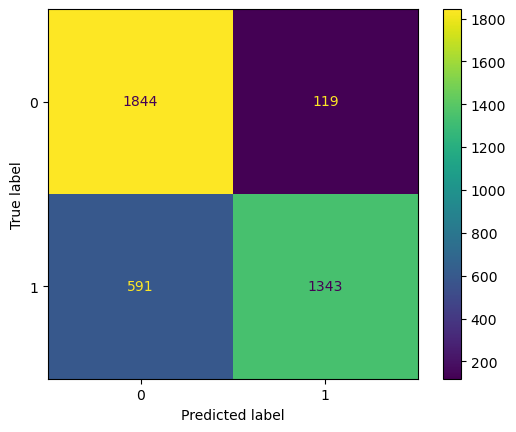

In [3276]:
rf_classifier = RandomForestClassifier(n_estimators=9, max_depth=65)

rf_classifier.fit(Ex_X34train, Ex_y34train)

# Generate predictions with the best model
ypred = rf_classifier.predict(Ex_X34test)

# Create the confusion matrix

ConMat = confusion_matrix(Ex_y34test, ypred)

ConfusionMatrixDisplay(confusion_matrix=ConMat).plot();

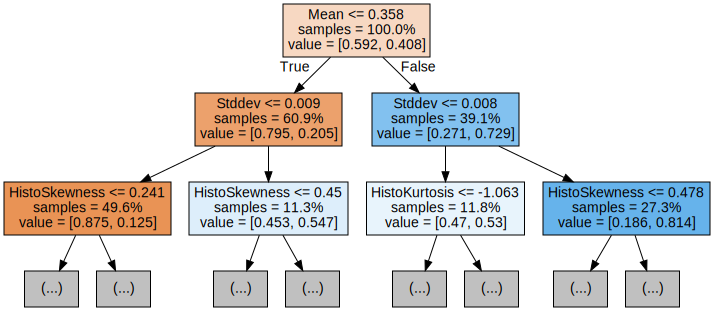

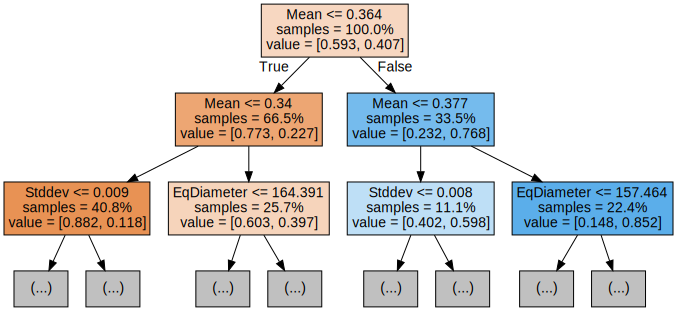

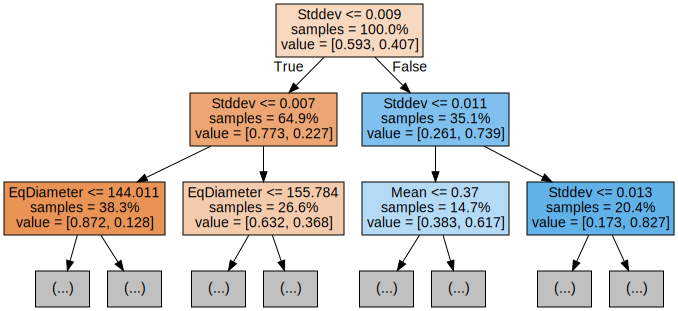

In [3282]:
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Ex_X34train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    graph.render(filename=f"TreeViz_{i}", format='png', cleanup=True)


In [3277]:
accuracy = accuracy_score(Ex_y34test, ypred)
precision = precision_score(Ex_y34test, ypred)
recall = recall_score(Ex_y34test, ypred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8178085706954067
Precision: 0.9186046511627907
Recall: 0.6944157187176836


In [1914]:
#Creating ROC AOC Curve and Metric

# Predict probabilities for the positive class
y_prob = rf_classifier.predict_proba(Ex_X22test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Ex_y22test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7623379234706312


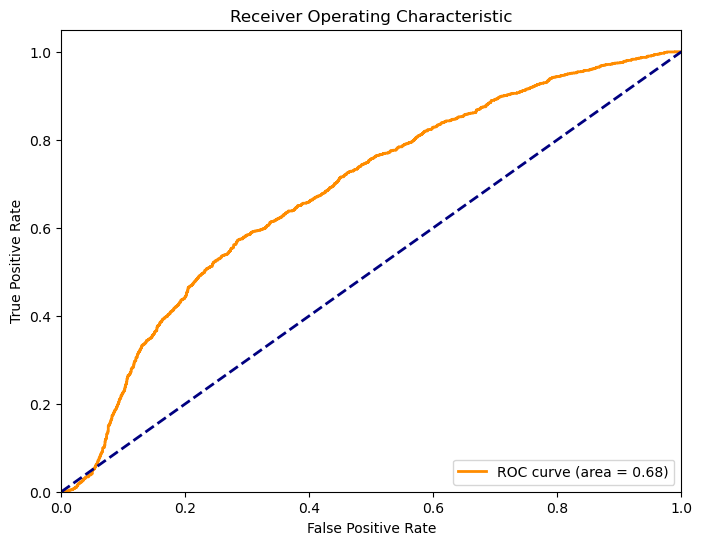

In [1735]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#plt.savefig("E:/Paper Figures/AlphaBetaPaper/ROC1.png")


plt.show()

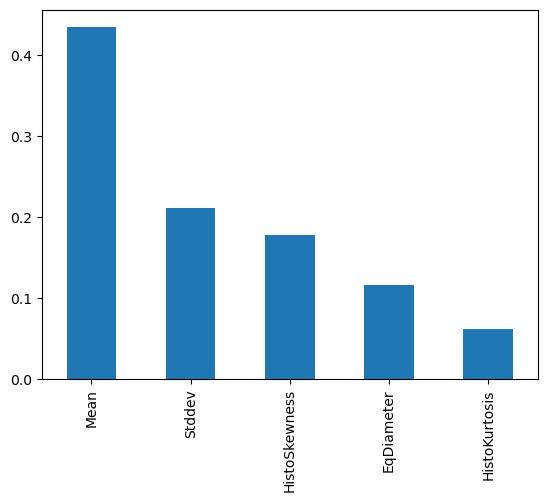

In [1737]:

feature_importances = pd.Series(rf_classifier.feature_importances_, index=Ex_X29train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [2306]:
def my_metric(model, X, y):
    predictions = model.predict(X)
    return accuracy_score(y, predictions)

def permutation_importances(MLmodel, X_train, y_train, metric):
    baseline = metric(MLmodel, X_train, y_train)
    importances = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(MLmodel, X_train, y_train)
        X_train[col] = save
        importances.append(baseline - m)
    return np.array(importances)

[0.17513043 0.08179773 0.0622218  0.01115206 0.07514479]


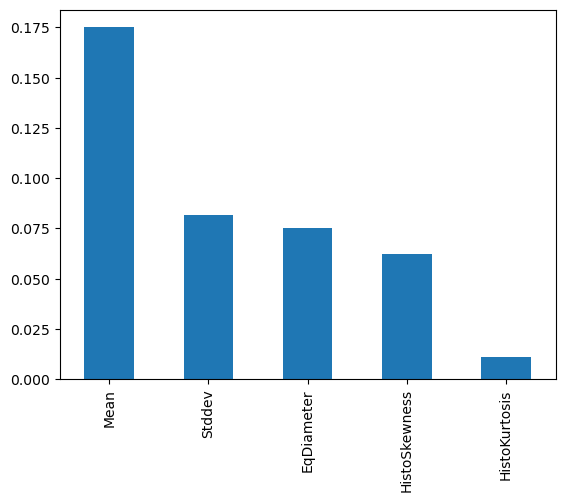

In [1747]:
permuted = permutation_importances(rf_classifier, Ex_X32train, Ex_y32train, my_metric)

feature_permutated = pd.Series(permuted, index=Ex_X32train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_permutated.plot.bar();

print(permuted)

In [1526]:
Ex_X3train.head()

,Mean,Stddev,HistoSkewness,HistoKurtosis,EqDiameter
0,0.380514,0.009930,-0.316123,-0.016329,121.661367
1,0.381200,0.010422,-0.228836,-0.510923,150.277310
2,0.381146,0.016699,0.113159,-0.367623,216.244948
3,0.383929,0.021942,0.506130,-0.224103,247.538681
4,0.382005,0.016680,0.326482,-0.575477,182.665329


# XGBoost

In [2417]:
pbounds = {
    'learning_rate': (0.001, 1.0),
    'n_estimators': (10, 800),
    'max_depth': (3,10),
    'subsample': (0.5, 1.0),  # Change for big datasets
    'min_child_weight': (1,10),
    'gamma': (0, 5),
    'reg_lambda': (0,5),
    'reg_alpha': (0,5)

}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        min_child_weight,
                        gamma,
                        reg_lambda,
                        reg_alpha
                       ):
    
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    LOGO = LeaveOneGroupOut()
    
    clf = xgb.XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        min_child_weight = min_child_weight,
        gamma=gamma,
        reg_lambda = reg_lambda,
        reg_alpha = reg_alpha
    )
    return np.mean(cross_val_score(clf, Ex_X47train, Ex_y47train, cv=LOGO, groups=GroupLabel47, scoring='accuracy'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)


In [2418]:
optimizer.maximize(init_points=10, n_iter=15)

|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.6923    | 2.085     | 0.7206    | 3.001     | 3.721     | 125.9     | 0.4617    | 0.9313    | 0.6728    |
| 2         | 0.7087    | 1.984     | 0.5393    | 5.934     | 7.167     | 171.5     | 4.391     | 0.1369    | 0.8352    |
| 3         | 0.7022    | 2.087     | 0.5591    | 3.983     | 2.783     | 642.6     | 4.841     | 1.567     | 0.8462    |
| 4         | 0.7004    | 4.382     | 0.8947    | 3.595     | 1.351     | 144.2     | 4.391     | 0.4917    | 0.7106    |
| 5         | 0.7094    | 4.789     | 0.5336    | 7.843     | 3.84      | 552.3     | 4.173     | 0.09144   | 0.8751    |
| 6         | 0.6951    | 4.944     | 0.7484    | 4.963     | 8.104     | 91.55     | 2.239     | 4.543     | 0.6468    |
| 7         | 0.7031    

In [2419]:
optimizer.max

{'target': 0.7094018277978648,
 'params': {'gamma': 4.78944765075251,
  'learning_rate': 0.533632119688044,
  'max_depth': 7.843139797653313,
  'min_child_weight': 3.8396406790545665,
  'n_estimators': 552.3357328684511,
  'reg_alpha': 4.1731283594868644,
  'reg_lambda': 0.09144138672095903,
  'subsample': 0.8750721574724838}}

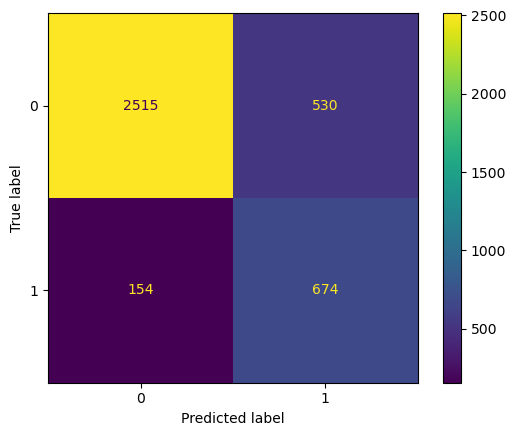

In [2420]:
#Convert to proper dictionary format to use for the XG_classifier
optimizer.max
dictionarymax = optimizer.max
Maxvalues = dictionarymax.get('params')

#maximized parameters 
XG_classifier = xgb.XGBClassifier(
    n_estimators = int(Maxvalues.get('n_estimators')),
    max_depth = int(Maxvalues.get('max_depth')),
    learning_rate = Maxvalues.get('learning_rate'),
    gamma = Maxvalues.get('gamma'),
    min_child_weight = Maxvalues.get('min_child_weight'),
    reg_alpha = Maxvalues.get('reg_alpha'),
    reg_lambda = Maxvalues.get('reg_lambda'),
    subsample =  Maxvalues.get('subsample')
)
#Model building
XG_classifier.fit(Ex_X47train, Ex_y47train)

# Generate predictions with the best model
ypredXG = XG_classifier.predict(Ex_X47test)

# Create the confusion matrix

ConMatXG = confusion_matrix(Ex_y47test, ypredXG)

ConfusionMatrixDisplay(confusion_matrix=ConMatXG).plot();

In [2425]:
accuracy = accuracy_score(Ex_y47test, ypredXG)
precision = precision_score(Ex_y47test, ypredXG)
recall = recall_score(Ex_y47test, ypredXG)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8233927188226181
Precision: 0.5598006644518272
Recall: 0.8140096618357487


In [2426]:
# Predict probabilities for the positive class
y_probXG = XG_classifier.predict_proba(Ex_X47test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Ex_y47test, y_probXG)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8903825864845355


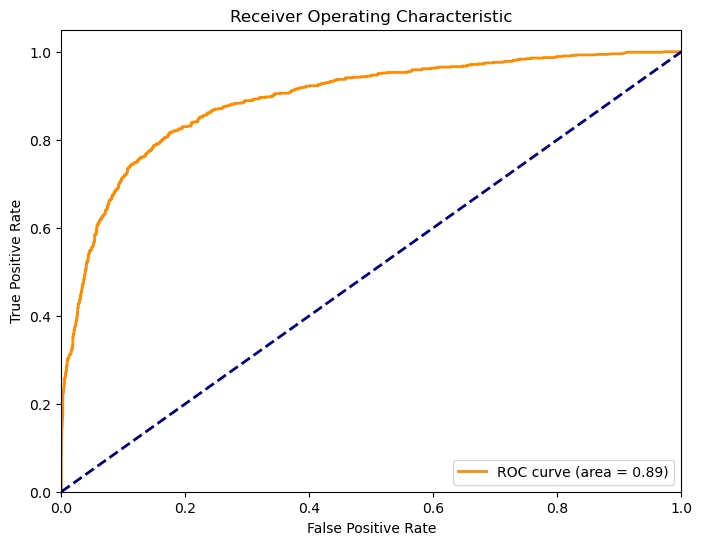

In [2427]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#plt.savefig("E:/Paper Figures/AlphaBetaPaper/ROC1.png")


plt.show()

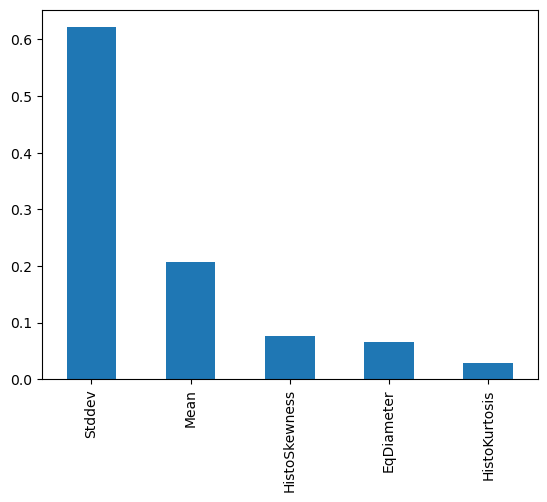

In [2428]:

feature_importancesXG = pd.Series(XG_classifier.feature_importances_, index=Ex_X47train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importancesXG.plot.bar();

[0.14178792 0.12565664 0.06406025 0.01506206 0.10752638]


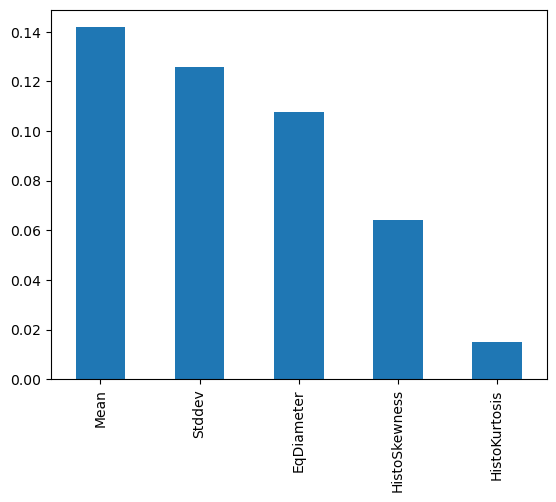

In [2430]:
permutedXG = permutation_importances(XG_classifier, Ex_X47train, Ex_y47train, my_metric)

feature_permutatedXG = pd.Series(permutedXG, index=Ex_X47train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_permutatedXG.plot.bar();

print(permutedXG)

# Logistic Regression

In [3219]:
#Standardization for Logistic Regression 
stdtrain = StandardScaler().fit_transform(Ex_X29train)
stdtrainX = pd.DataFrame(stdtrain, columns = Ex_X29train.columns)

stdtest = StandardScaler().fit_transform(Ex_X29test)
stdtestX = pd.DataFrame(stdtest, columns = Ex_X29test.columns)

In [3220]:
param_gridlogistic = {
    'C': [.001, .01,.1,1],  # Example: exploring 6 values for n_estimators
    'max_iter': [100,125,150,200],  # Example: exploring 5 values for max_depth
  
}

# Create a random forest classifier
Logistic  = LogisticRegression(solver='lbfgs')

# Control Group K-fold classification
LOGO = LeaveOneGroupOut()

# Define a custom scoring function to incorporate groups
scorer = make_scorer(accuracy_score)

# Use GridSearchCV to find the best hyperparameters
grid_searchLogistic = GridSearchCV(Logistic, 
                              param_grid = param_gridlogistic, 
                              cv=LOGO,
                              scoring=scorer,
                              verbose = 2)

# Fit the GridSearchCV object to the data
grid_searchLogistic.fit(stdtrainX, Ex_y29train, groups=GroupLabel29)




Fitting 13 folds for each of 16 candidates, totalling 208 fits
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001, max_iter=100; total time=   0.0s
[CV] END ..............................C=0.001

GridSearchCV(cv=LeaveOneGroupOut(), estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 125, 150, 200]},
             scoring=make_scorer(accuracy_score), verbose=2)

In [3221]:
print('Best hyperparameters:',  grid_searchLogistic.best_params_)

Best hyperparameters: {'C': 1, 'max_iter': 100}


In [2852]:
#most common hyperparameters logreg = C: 0.01 and max_iter: 100

In [3222]:
LogReg = LogisticRegression(solver='lbfgs', C = 1, max_iter = 100, random_state=0)

LogReg.fit(stdtrainX, Ex_y29train)


LogisticRegression(C=1, random_state=0)

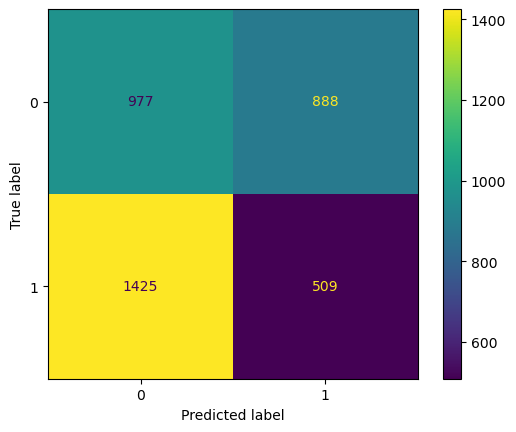

In [3223]:
# Generate predictions with the best model
ypredLog = LogReg.predict(stdtestX)

# Create the confusion matrix

ConMatLog = confusion_matrix(Ex_y29test, ypredLog)

ConfusionMatrixDisplay(confusion_matrix=ConMatLog).plot();

In [3224]:
accuracyLog = accuracy_score(Ex_y29test, ypredLog)
precisionLog = precision_score(Ex_y29test, ypredLog)
recallLog = recall_score(Ex_y29test, ypredLog)

print("Accuracy:", accuracyLog)
print("Precision:", precisionLog)
print("Recall:", recallLog)

Accuracy: 0.39115556725454065
Precision: 0.36435218324982105
Recall: 0.2631851085832472


In [3225]:
# Predict probabilities for the positive class
y_probLog = LogReg.predict_proba(stdtestX)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Ex_y29test, y_probLog)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.3398271650803596


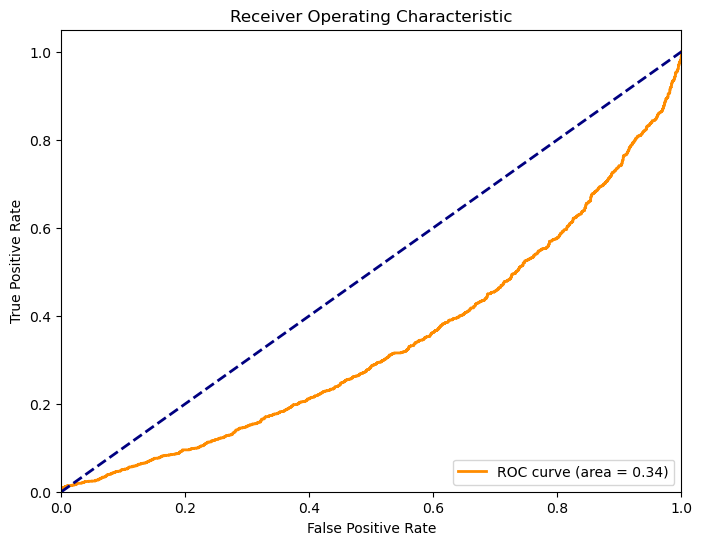

In [3226]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#plt.savefig("E:/Paper Figures/AlphaBetaPaper/ROC1.png")


plt.show()

Feature: 0, Score: 1.78508
Feature: 1, Score: 0.64077
Feature: 2, Score: -0.74467
Feature: 3, Score: -0.02635
Feature: 4, Score: 0.25198


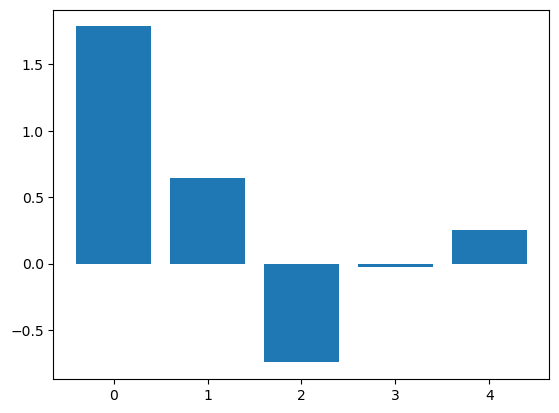

In [3227]:
importanceLog = LogReg.coef_[0]
for i,v in enumerate(importanceLog):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importanceLog))], importanceLog)
pyplot.show()

In [3229]:
def my_metric(model, X, y):
    predictions = model.predict(X)
    return accuracy_score(y, predictions)
    
def permutation_importances(MLmodel, X_train, y_train, metric):
    baseline = metric(MLmodel, X_train, y_train)
    importances = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(MLmodel, X_train, y_train)
        X_train[col] = save
        importances.append(baseline - m)
    return np.array(importances)

[0.19068798 0.02209868 0.03604355 0.00037063 0.00588372]


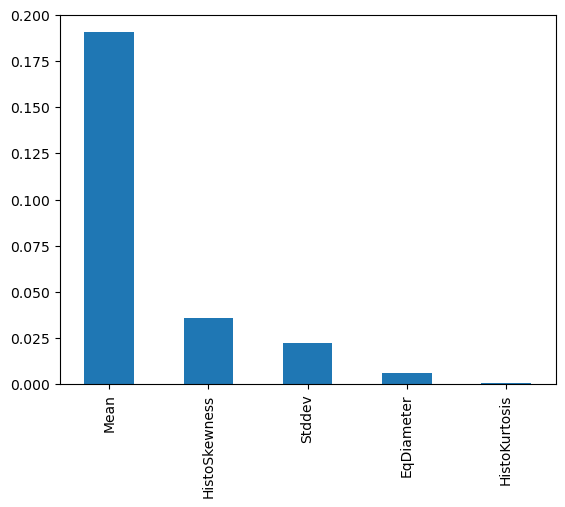

In [3228]:
permutedLog = permutation_importances(LogReg, stdtrainX, Ex_y29train, my_metric)

feature_permutatedLog = pd.Series(permutedLog, index=stdtrainX.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_permutatedLog.plot.bar();

Featurearray = np.round(permutedLog,13)
print(Featurearray)

# Correlation Matrices and Dendrograms

In [1039]:
filtered_combined_dfBothtotal.head(3)

,Mean,Median,Majority,Maximum,Minimum,Stddev,HistoQuantile25,HistoQuantile75,LAC InterQuantile Range,HistoSkewness,HistoKurtosis,EqDiameter,Volume3d,Area3d,Label
0,0.372187,0.372929,0.371851,0.380252,0.360607,0.005165,0.369572,0.375679,0.006107,-0.664841,0.092094,111.473518,725293.820,39167.619256,0
1,0.372027,0.372273,0.372010,0.379699,0.362798,0.004332,0.368729,0.373783,0.005054,0.060758,-0.545557,118.458280,870352.584,43555.756428,0
2,0.394020,0.391791,0.394144,0.416728,0.373160,0.010145,0.387169,0.402133,0.014964,0.236442,-0.745619,188.691515,3517675.027,113391.252560,0


In [1040]:
CorrCombineddf = filtered_combined_dfBothtotal.drop(['Label'],axis=1)

In [ ]:
from scipy.cluster import hierarchy


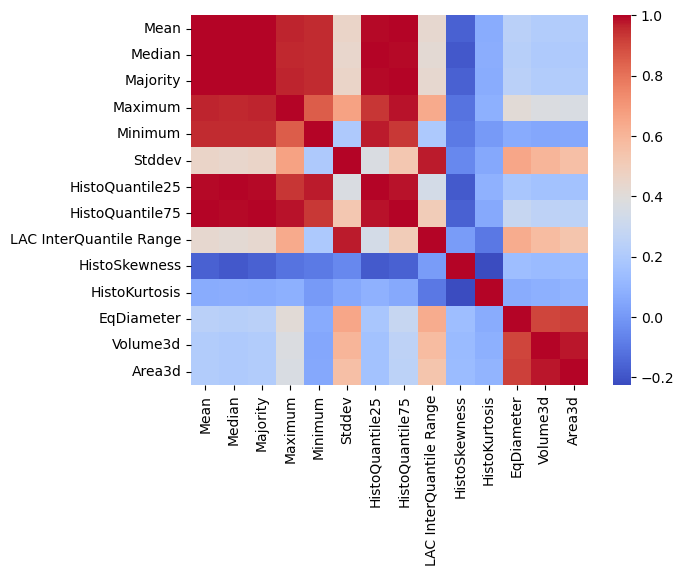

In [1110]:
corr_matrix = CorrCombineddf.corr()

# Display the correlation matrix
#print(corr_matrix)

# Plotting the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.savefig("E:/Paper Figures/AlphaBetaPaper/Alpha Beta Parameter Corr Plot.png", bbox_inches="tight")


plt.show()


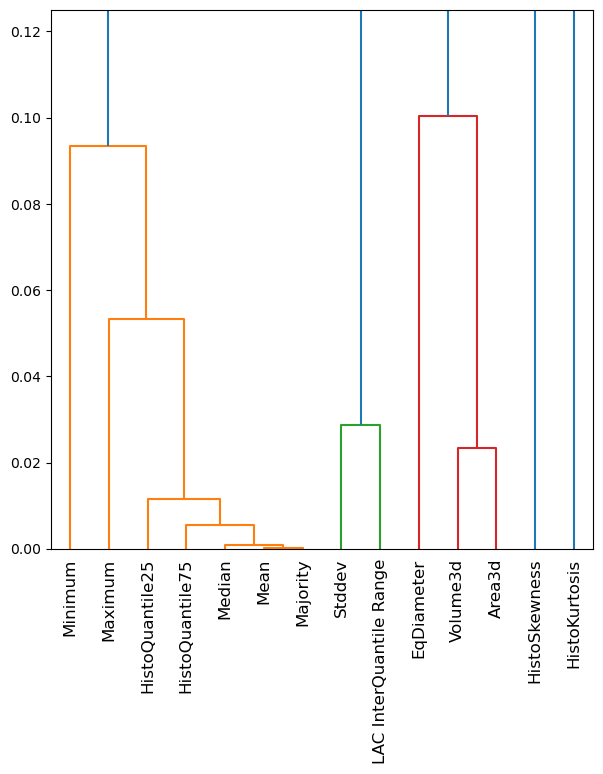

In [1113]:
fig, ax = plt.subplots(figsize=(7, 7))

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr_matrix)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=CorrCombineddf.columns.to_list(), 
    leaf_rotation = 90, #rotating column names
    color_threshold=0.5, #threshold for clustering 
    ax=ax  #Control axis 
)

ax.set_ylim([0, 0.125])  # Adjust limits

plt.savefig("E:/Paper Figures/AlphaBetaPaper/Alpha Beta Parameter Dendrogram.png", bbox_inches="tight")


plt.show()



In [3235]:
LogRegStats = pd.read_excel("E:/Paper Figures/AlphaBetaPaper/Tables/Machine Learning Logistic Regression.xlsx")
RFStats = pd.read_excel("E:/Paper Figures/AlphaBetaPaper/Tables/Machine Learning Random Forest Statistics.xlsx")
XGBoostStats = pd.read_excel("E:/Paper Figures/AlphaBetaPaper/Tables/Machine Learning XGBoost Statistics.xlsx")

In [3305]:
threshholdacc = 0.75
FilAccXGBoostStats = XGBoostStats[XGBoostStats["Accuracy"] >= threshholdacc]
FilAccXGBoostStats.tail()

,Combination,Accuracy,Precision,Recall,F1,ROC,Mean,Stdev,Skew,Kurt,Diameter
52,53,0.851964,0.876560,0.735311,0.799747,0.935785,0.067415,0.142884,0.07708,0.013834,0.115122
53,54,0.843409,0.776892,0.794066,0.785386,0.916879,0.082202,0.130213,0.057759,0.012949,0.091222
54,55,0.808528,0.861626,0.702734,0.774111,0.909488,0.079255,0.168279,0.093079,0.031979,0.13349
55,56,0.862594,0.936055,0.706806,0.805436,0.962145,0.063234,0.131016,0.095728,0.024204,0.136131
56,Average,0.752170,0.716878,0.715437,0.698408,0.834748,0.118102,0.117008,0.089057,0.026901,0.11982


In [3310]:
FilAccXGBoostStats["Diameter"].mean()

0.11660395996811225

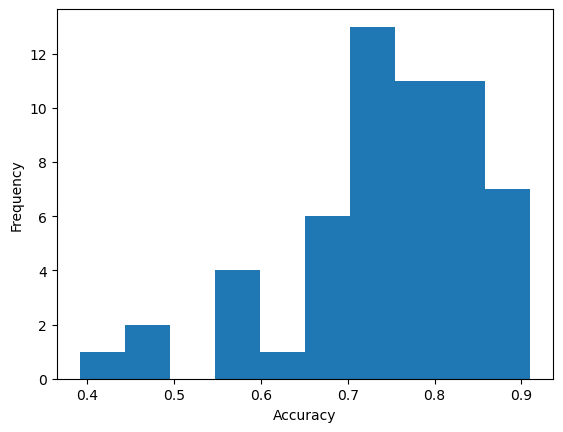

In [3311]:
AccuracyLogReg = LogRegStats.loc[0:55, "Accuracy"]
plt.hist(AccuracyLogReg, bins = 10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [3260]:
print("Accuracy:", AccuracyLogReg.mean())
print("Standard Deviation:", AccuracyLogReg.std())
print("Skew:", AccuracyLogReg.skew())
print("Kurtosis:", AccuracyLogReg.kurt())

Accuracy: 0.7459892835391242
Standard Deviation: 0.11331705439259845
Skew: -1.1491779055784335
Kurtosis: 1.4117014481922459


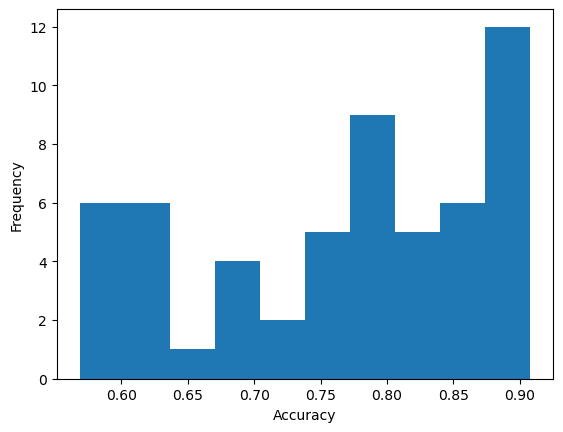

In [3312]:
AccuracyRF = RFStats.loc[0:55, "Accuracy"]
plt.hist(AccuracyRF, bins = 10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [3261]:
print("Accuracy:", AccuracyRF.mean())
print("Standard Deviation:", AccuracyRF.std())
print("Skew:", AccuracyRF.skew())
print("Kurtosis:", AccuracyRF.kurt())

Accuracy: 0.7661268763305861
Standard Deviation: 0.10731111781278883
Skew: -0.42534066216840377
Kurtosis: -1.1010875362049148


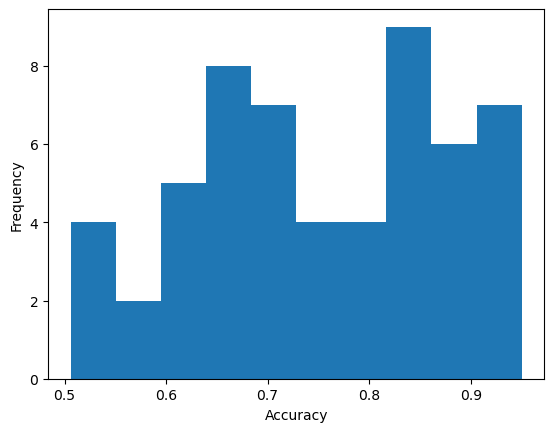

In [3313]:
AccuracyXGB = XGBoostStats.loc[0:55, "Accuracy"]
plt.hist(AccuracyXGB, bins = 10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

In [3314]:
print("Accuracy:", AccuracyXGB.mean())
print("Standard Deviation:", AccuracyXGB.std())
print("Skew:", AccuracyXGB.skew())
print("Kurtosis:", AccuracyXGB.kurt())

Accuracy: 0.7521695726983229
Standard Deviation: 0.12097264020784693
Skew: -0.2115975005539884
Kurtosis: -0.9266203671475979


In [3263]:
# idk what bottom plots are for

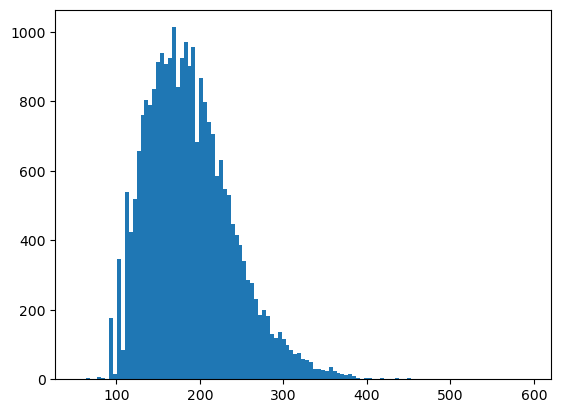

In [36]:
plt.hist(combined_dfBothtotal.iloc[:,10], bins = 'auto')
plt.show()

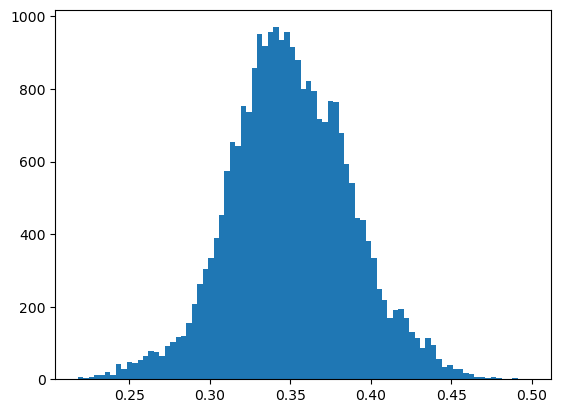

In [37]:
plt.hist(combined_dfBothtotal.iloc[:,0], bins ='auto')
plt.show()